In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import nolds

%matplotlib inline

# Mapa de Rulkov

Se simula un mapa de Rulkov como un sistema dinamico discreto de 4 variables

## Variables: 
- sigma: Emula la accion de una corriente DC bias externa sobre la neurona
- alpha: Parametro de control que produce los diferentes patrones de disparo
- xi(n): Potencial trans-membrana de la i-ava neurona en el tiempo n
- yi(n): Variacion de la corriente de recuperacion ionica
- eta: Parametro positivo pequeño << 1
- gamma: Funcion sigmoidal de entrada-salida
- f: Funcion de acoplamiento interno
- gc: Fuerza de la sinapsis quimica
- e: Fuerza de acoplamiento interno
- vs: Potencial sinaptico reverso
- k: Slope de la sigmoidal
- titas: Umbral de disparo sinaptico

Los resultados se capturan en r1 y r2 donde: rx = [Xx, Yx]

In [4]:
#Constantes
eta = 0.001
sigma = -1.6
vs = -1.4
k=50
titas = -1.4
e=0.5
gc = 1.0

#Functions
def f(x, y):
    global alpha
    return alpha/(1 + x**2) + y

def gamma(x):
    global k, titas
    return 1/(1 + math.exp(-1*k*(x-titas)))

def next_x1(x1, y1, x2, y2): 
    global gc, vs, e
    return f(x1, y1) + gc*(vs-x1)*gamma(x2) + e*(f(x2,y2)-f(x1,y1))

def next_y1(x1, y1):
    global eta, sigma
    return y1 - eta*(x1-sigma)

def next_x2(x1, y1, x2, y2):
    return next_x1(x2, y2, x1, y1)

def next_y2(x2, y2):
    return next_y1(x2, y2)

def initialize(a):
    global alpha, x1, x2, y1, y2, r1, r2
    alpha = a
    x1 = -1.6
    x2 = -1.6
    y1 = -2.58
    y2 = -2.58
    r1 = []
    r2 = []

def update():
    global x1, x2, y1, y2
    nx1 = next_x1(x1, y1, x2, y2)
    nx2 = next_x2(x1, y1, x2, y2)
    ny1 = next_y1(x1, y1)
    ny2 = next_y2(x2, y2)
    x1 = nx1
    x2 = nx2
    y1 = ny1
    y2 = ny2

def observe():
    global r1, r2
    r1.append([x1, y1])
    r2.append([x2, y2])
    
def plot_bifurcation(a, ax):
    global r1
    color = ',b'
    if (a < 3.95):
        color = ',r'
    elif (a < 4.9):
        color = ',g'
    out = [r[0] for r in r1]
    ax.plot([a] * len(out), out, color, alpha=0.25)
    ax.set_title("Diagrama de Bifurcacion")
    ax.set_xlabel('a')
    ax.set_ylabel('x1')
    ax.set_xlim(3.5,5.1)

def plot_lyapunov(a, ax):
    global r1
    lyapunov = max(nolds.lyap_e([r[0] for r in r1]))
    ax.plot(a,lyapunov, '.r')
    ax.set_title("Estimacion de MLE")
    ax.set_xlabel('a')
    ax.set_ylabel('Max(L)')
    ax.set_xlim(3.5,5.1)
    ax.set_ylim(-0.1,0.3)

CPU times: user 5min 39s, sys: 0 ns, total: 5min 39s
Wall time: 5min 39s


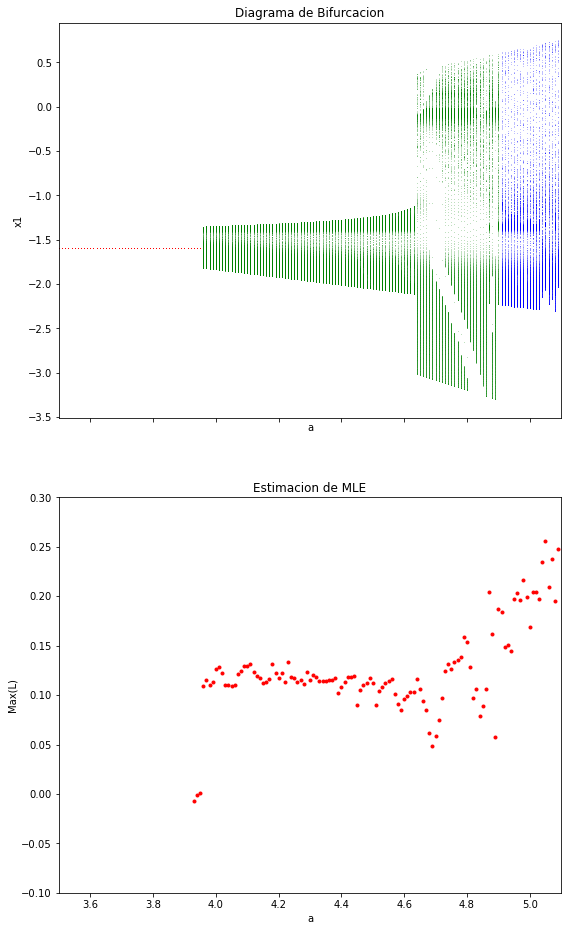

In [5]:
%%time

#hiperparametros
steps = int(1e4)
output= 1000
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8*2), sharex=True)

for a in np.arange(3,5.1,0.01):
    initialize(a)
    for t in range(steps):
        update()
        if(t >= steps - output):
            observe()
    plot_bifurcation(a, ax1)
    plot_lyapunov(a, ax2)

(195500.0, 200000.0)

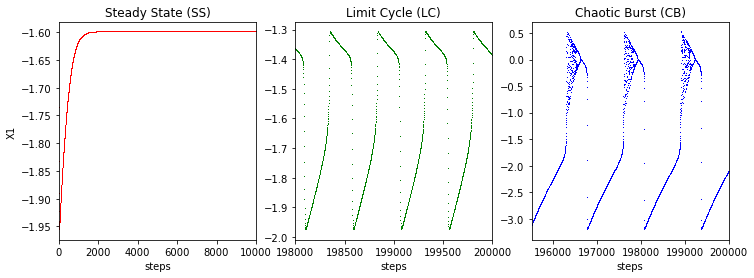

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 8*2), sharex=False)
fig.set_figheight(4)
fig.set_figwidth(12)
#Steady
steps = int(1e4)
output = 10000
initialize(3.0)
for t in range(steps):
    update()
    if(t >= steps - output):
        observe()
        
ax1.plot(list(range(steps-output, steps)), [r[0] for r in r1], ',r', alpha=1.0)
ax1.set_title("Steady State (SS)")
ax1.set_xlabel('steps')
ax1.set_xlim(0, 10000)
ax1.set_ylabel('X1')

# Limit Cycle
steps = int(2e5)
output = 3000
initialize(4.3)
for t in range(steps):
    update()
    if(t >= steps - output):
        observe()
        
ax2.plot(list(range(steps-output, steps)), [r[0] for r in r1], ',g', alpha=1.0)
ax2.set_title("Limit Cycle (LC)")
ax2.set_xlabel('steps')
ax2.set_xlim(198000, 200000)

#Chaotic Burst
steps = int(2e5)
output = 4500
initialize(4.8)
for t in range(steps):
    update()
    if(t >= steps - output):
        observe()
        
ax3.plot(list(range(steps-output, steps)),[r[0] for r in r1], ',b', alpha=1.0)
ax3.set_title("Chaotic Burst (CB)")
ax3.set_xlabel('steps')
ax3.set_xlim(195500, 200000)